# Problem statement
The following assignment concerns the well-known Anscombe’s quartet dataset. You
are required to create a Jupyter notebook analysing the dataset. There are four
distinct tasks to be carried out in your Jupyter notebook.
1. Explain the background to the dataset – who created it, when it was created, and
any speculation you can find regarding how it might have been created.
2. Plot the interesting aspects of the dataset.
3. Calculate the descriptive statistics of the variables in the dataset.
4. Explain why the dataset is interesting, referring to the plots and statistics above.


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("asc_data.csv")

In [12]:
df

,Observation,x1,y1,Unnamed: 3,x2,y2,Unnamed: 6,x3,y3,Unnamed: 9,x4,y4
0,1,10,8.04,NaN,10,9.14,NaN,10,7.46,NaN,8,6.58
1,2,8,6.95,NaN,8,8.14,NaN,8,6.77,NaN,8,5.76
2,3,13,7.58,NaN,13,8.74,NaN,13,12.74,NaN,8,7.71
3,4,9,8.81,NaN,9,8.77,NaN,9,7.11,NaN,8,8.84
4,5,11,8.33,NaN,11,9.26,NaN,11,7.81,NaN,8,8.47
5,6,14,9.96,NaN,14,8.10,NaN,14,8.84,NaN,8,7.04
6,7,6,7.24,NaN,6,6.13,NaN,6,6.08,NaN,8,5.25
7,8,4,4.26,NaN,4,3.10,NaN,4,5.39,NaN,19,12.50
8,9,12,10.84,NaN,12,9.13,NaN,12,8.15,NaN,8,5.56
9,10,7,4.82,NaN,7,7.26,NaN,7,6.42,NaN,8,7.91


In [13]:
df.describe()

,Observation,x1,y1,Unnamed: 3,x2,y2,Unnamed: 6,x3,y3,Unnamed: 9,x4,y4
count,11.000000,11.000000,11.000000,0.0,11.000000,11.000000,0.0,11.000000,11.000000,0.0,11.000000,11.000000
mean,6.000000,9.000000,7.500909,NaN,9.000000,7.500909,NaN,9.000000,7.500000,NaN,9.000000,7.500909
std,3.316625,3.316625,2.031568,NaN,3.316625,2.031657,NaN,3.316625,2.030424,NaN,3.316625,2.030579
min,1.000000,4.000000,4.260000,NaN,4.000000,3.100000,NaN,4.000000,5.390000,NaN,8.000000,5.250000
25%,3.500000,6.500000,6.315000,NaN,6.500000,6.695000,NaN,6.500000,6.250000,NaN,8.000000,6.170000
50%,6.000000,9.000000,7.580000,NaN,9.000000,8.140000,NaN,9.000000,7.110000,NaN,8.000000,7.040000
75%,8.500000,11.500000,8.570000,NaN,11.500000,8.950000,NaN,11.500000,7.980000,NaN,8.000000,8.190000
max,11.000000,14.000000,10.840000,NaN,14.000000,9.260000,NaN,14.000000,12.740000,NaN,19.000000,12.500000


In [14]:
df.x1

0     10
1      8
2     13
3      9
4     11
5     14
6      6
7      4
8     12
9      7
10     5
Name: x1, dtype: int64

In [15]:
df_clean = df.drop(columns=['Unnamed: 3', 'Unnamed: 6', 'Unnamed: 9', 'Observation'])

In [16]:
df_clean

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [17]:
df_clean.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


In [18]:
df_clean.loc[:,'x1']

0     10
1      8
2     13
3      9
4     11
5     14
6      6
7      4
8     12
9      7
10     5
Name: x1, dtype: int64

In [19]:
import matplotlib.pyplot as plt

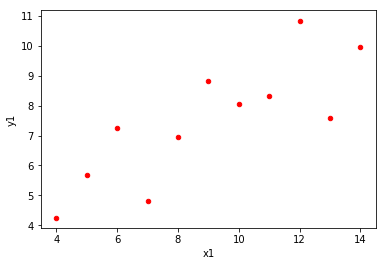

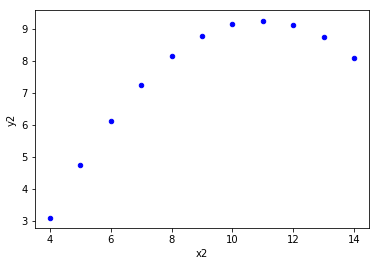

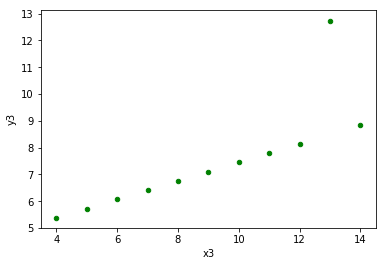

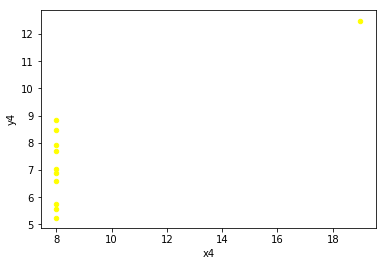

In [22]:
df_clean.plot(kind='scatter',x='x1',y='y1',color='red')
df_clean.plot(kind='scatter',x='x2',y='y2',color='blue')
df_clean.plot(kind='scatter',x='x3',y='y3',color='green')
df_clean.plot(kind='scatter',x='x4',y='y4',color='yellow')
plt.show()